In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np

from IPython.display import Math, clear_output

In [3]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Liczba pożarów")
    plt.ylabel("Liczba włamań")

In [ ]:
# w powyższych komórkach nic nie zmieniamy

## Regresja liniowa

Plik `fires_thefts.csv` zawiera rzeczywiste dane zebrane przez _U.S. Commission on Civil Rights_, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). Celem jest stworzenie modelu przewidującego liczbę włamań na podstawie liczby pożarów.

### Zadanie 1

Odpowiedz na pytanie: jak będą wyglądały kolejne kroki metody gradientu prostego, gdy okaże się, że w pierwszym kroku współczynniki theta zostały zainicjalizowane wartościami wskazującymi na minimum lokalne?

#### Odp.

Nie będzie kolejnych kroków, skoro znajdujemy się w minimum lokalnym, to pochodna w tym punkcie będzie równa 0. Wagi nie zostaną więc zaktualizowane i algorytm zakończy swoje działanie.

### Zadanie 2

Wczytaj dane z pliku, a następnie stwórz zmienne X i y oraz przypisz im odpowiednie wartości.

In [6]:
df = pd.read_csv("fires_thefts.csv")
X = df[['fires']].values
y = df['thefts'].values

### Zadanie 3

Dokończ implementację funkcji J, która jest funkcją kosztu i realizuję metodę najmniejszych kwadratów. dla przypomnienia, jej wzór wygląda następująco:

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

gdzie $m$ - liczba przykładów w zestawie danych

In [4]:
def J(h, theta, X, y):
    # h to funkcja
    # theta to lista współczynników: [theta_0, theta_1]
    # X i y to zmienne przechowujące dane
    # wywołanie tej funkcji w sposób J(linear_function, [1, 2], X, y) powinno zwrócić wartość 228.41857142857137
    m = y.size
    return 1 / (2 * m) * sum((h(theta, X[i][0]) - y[i]) ** 2 for i in range(m))

In [7]:
J(linear_function, [1, 2], X, y)

228.41857142857137

### Zadanie 4

Dobierz ręcznie, przy pomocy poniższych widgetów (nie zmieniając kodu) parametry theta w taki sposób, by wartość funkcji kosztu była możliwie jak najmniejsza

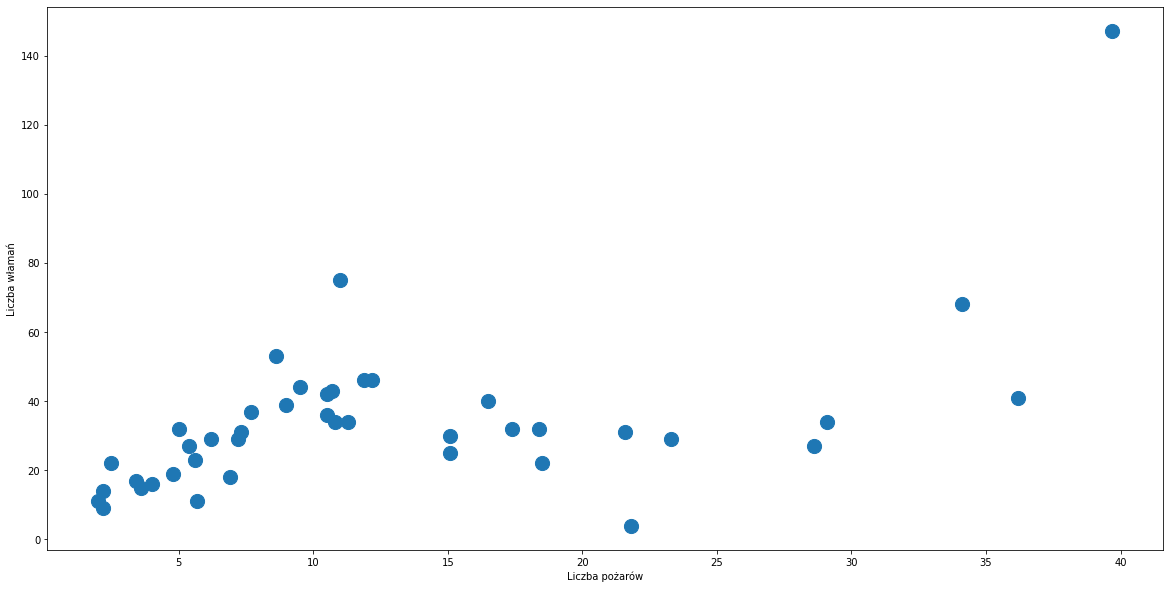

Output()

In [8]:
slider_theta_0 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta0', layout={'width': "auto"})
slider_theta_1 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta1', layout={'width': "auto"})
out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()
        display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"))
        
        
with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

### Zadanie 5

Wytrenuj na tych danych model regresji liniowej

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Zadanie 6

Korzystając z zaimplementowanych wyżej funkcji oraz współczynników wytrenowanego modelu nanieś na wykres prostę regresyjną i oblicz wartość funkcji kosztu dla tych współczynników. Spójrz, jak daleko byłeś od idealnego rozwiązania dobierając parametry ręcznie.

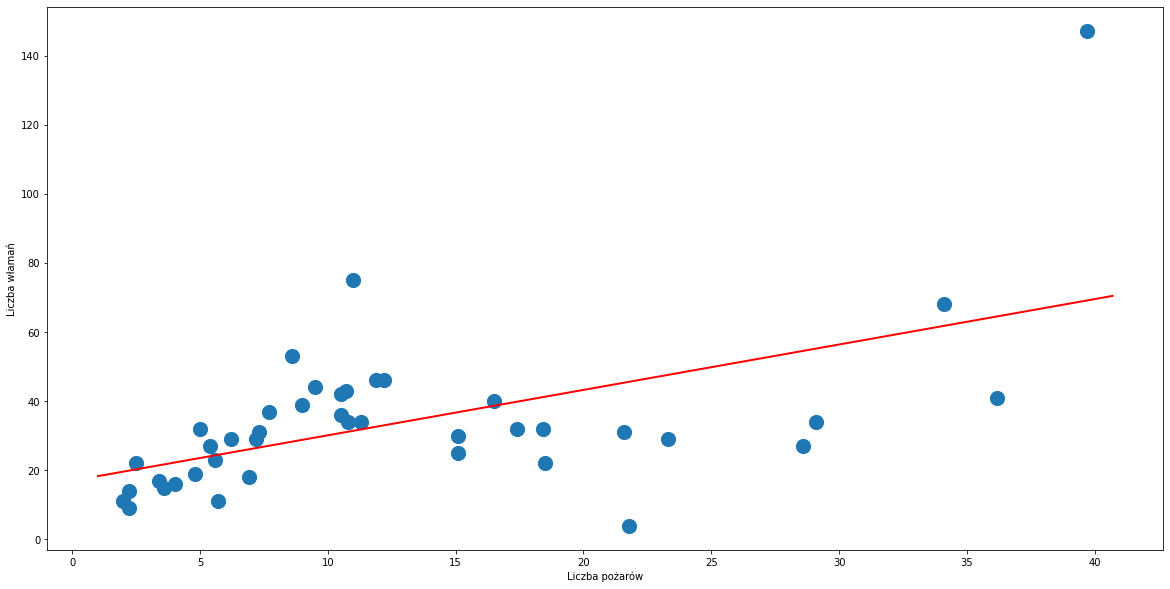

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
theta = np.concatenate([[model.intercept_], model.coef_])
plot_points(X, y)
plot_function(theta, X, 'r')
plt.show()
display(Math(rf"\Large \theta = {theta.tolist()}"))
display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"))

### Zadanie 7

Wykorzystując uzyskany model regresyjny przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnic, w których występują średnio kolejno: 10, 20 i 50 pożarów na tysiąc gospodarstw domowych.

In [26]:
model.predict(np.array([[10], [20], [50]]))

array([30.12971728, 43.26427733, 82.66795748])

### Zadanie 8

Wytrenuj model regresyjny drzewa decyzyjnego i dokonaj predykcji dla tych samych wartości pożarów na tysiąc gospodarstw domowych co wyżej. Porównaj otrzymane wyniki.

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, y)

model.predict(np.array([[10], [20], [50]]))

array([ 44.,  22., 147.])

### Zadanie 9

Potrafimy wytrenować model i dokonać predykcji dla przykładowych danych. Ale skąd mamy wiedzieć, na ile jest on dobry? Zastanów się, w jaki sposób moglibyśmy zbadać skuteczność takiego modelu - jak sprawdzić, czy i jak często ma rację, albo się myli?